In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

[[0.02006917 0.01998016 0.02009039 ... 0.02006964 0.02003667 0.02021285]
 [0.01000479 0.00999667 0.01004758 ... 0.01002035 0.00998933 0.01000588]
 [0.01515463 0.01482695 0.01508581 ... 0.01497254 0.015022   0.01511487]]
[[0.51149594 0.31424103 0.3657427  ... 0.62941804 0.12844355 0.29554535]
 [0.16961938 0.33684553 0.1690773  ... 0.61577475 0.33782616 0.53966952]
 [0.57817986 0.70504538 0.42709901 ... 0.80432882 0.60673887 0.333063  ]]


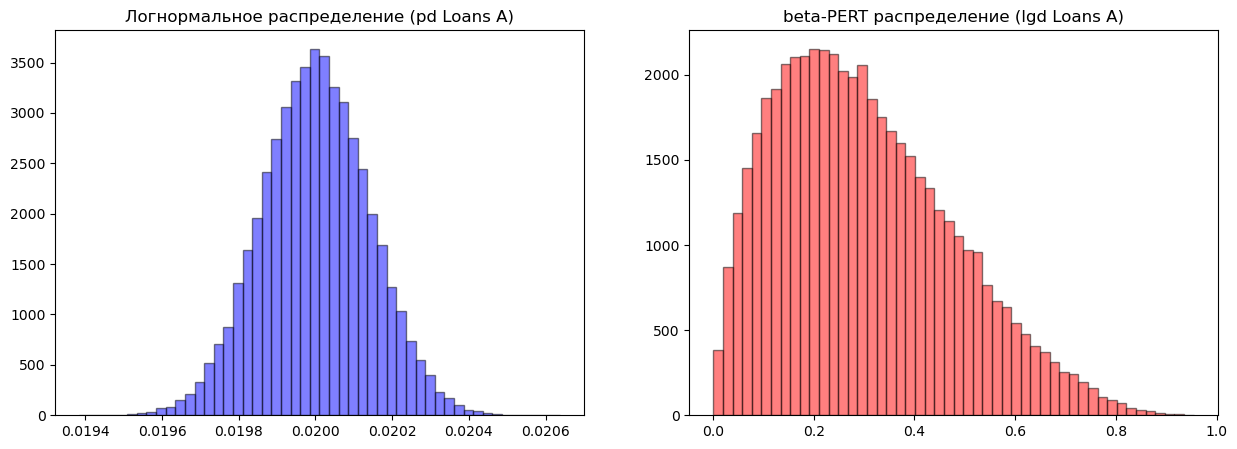

In [2]:
n = 50000 #Количество моделирований

np.random.seed(42)

mu1 = np.log(0.02) - 0.007**2/2                                     #mean брал за mu из википедии про Lognormal distribution
mu2 = np.log(0.01) - 0.005**2/2
mu3 = np.log(0.015) - 0.01**2/2

pd = np.array([                                                   
    np.random.lognormal(mean = mu1, sigma = 0.007, size = n),    #Probability of Default
    np.random.lognormal(mean = mu2, sigma = 0.005, size = n),
    np.random.lognormal(mean = mu3, sigma = 0.01, size = n)
])

print(pd)


def beta_pert(minn, mode, maxx, lambdda = 4, size = n):          #Формулы с выводами брал с https://www.riskamp.com/beta-pert
    delta = maxx - minn 
    mu = (minn + maxx + lambdda*mode)/(lambdda + 2)
    a = ((mu - minn)*(2*mode - minn - maxx))/((mode - mu)*(maxx - minn))
    b = (a*(maxx - mu))/(mu - minn)
    return np.random.beta(a = a, b = b, size = n)*delta + minn   

lgd = np.array([                                                 #Loss Given Default
    beta_pert(0, 0.2, 1,size = n),
    beta_pert(0, 0.3, 1,size = n),
    beta_pert(0, 0.4, 1,size = n)
])

print(lgd)

lgd1 = beta_pert(0, 0.2, 1,size = n)
pd1 = pd[0]

fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(pd1, bins = 50, color = 'b', edgecolor = 'black', alpha = 0.5)
ax[0].set_title('Логнормальное распределение (pd Loans A)')
ax[1].hist(lgd1, bins = 50, color = 'r', edgecolor = 'black', alpha = 0.5)
ax[1].set_title('beta-PERT распределение (lgd Loans A)')
plt.show()

In [3]:
ead = np.array([1000, 2000, 2500])           #Exposure at Default
ead = np.reshape(ead,(3,1))

el = ead * pd * lgd                          #Expected Losses
print(el)

[[10.26529871  6.27858693  7.34791355 ... 12.63219524  2.57358144
   5.97381324]
 [ 3.39401129  6.73466727  3.39763448 ... 12.34056311  6.7493114
  10.79973674]
 [21.9052556  26.13418645 16.10783621 ... 30.10711293 22.78608488
  12.58550687]]


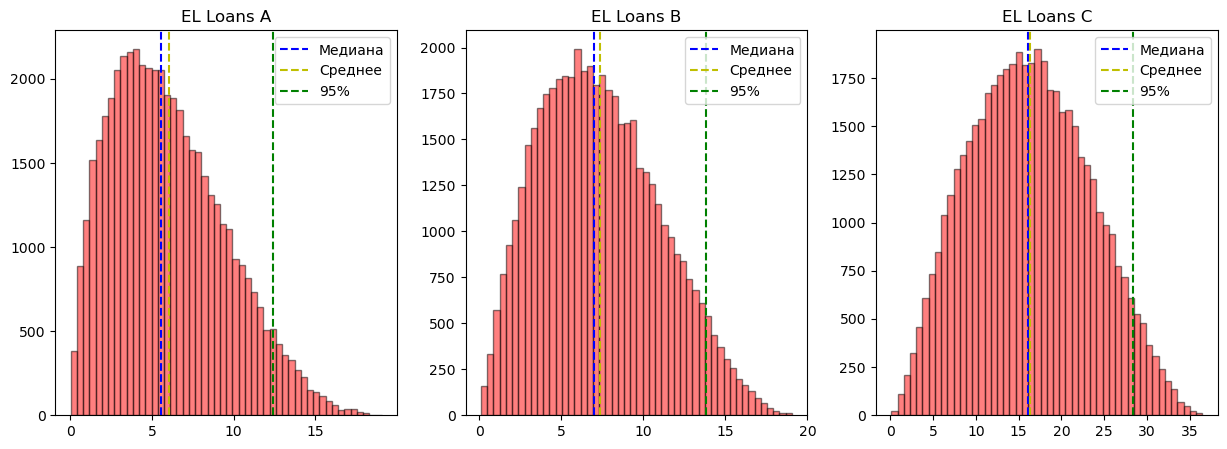

In [4]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
ax[0].hist(el[0], bins = 50, color = 'r', edgecolor = 'black', alpha = 0.5)
ax[0].set_title('EL Loans A')
ax[0].axvline(np.median(el[0]), ls = '--', c = 'b', label = 'Медиана')
ax[0].axvline(np.mean(el[0]), ls = '--', c = 'y', label = 'Среднее')
ax[0].axvline(np.percentile(el[0], 95), ls = '--', c = 'g', label = '95%')
ax[1].hist(el[1], bins = 50, color = 'r', edgecolor = 'black', alpha = 0.5)
ax[1].set_title('EL Loans B')
ax[1].axvline(np.median(el[1]), ls = '--', c = 'b', label = 'Медиана')
ax[1].axvline(np.mean(el[1]), ls = '--', c = 'y', label = 'Среднее')
ax[1].axvline(np.percentile(el[1], 95), ls = '--', c = 'g', label = '95%')
ax[2].hist(el[2], bins = 50, color = 'r', edgecolor = 'black', alpha = 0.5)
ax[2].set_title('EL Loans C')
ax[2].axvline(np.median(el[2]), ls = '--', c = 'b', label = 'Медиана')
ax[2].axvline(np.mean(el[2]), ls = '--', c = 'y', label = 'Среднее')
ax[2].axvline(np.percentile(el[2], 95), ls = '--', c = 'g', label = '95%')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [5]:
el_result = np.sum(el, axis = 0)
el_result

array([35.56456559, 39.14744065, 26.85338423, ..., 55.07987129,
       32.10897772, 29.35905684])

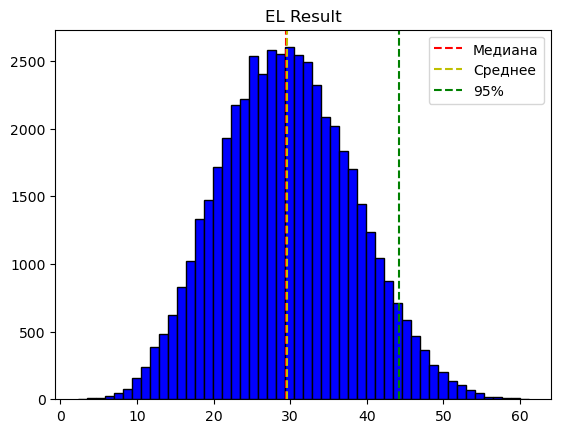

In [6]:
plt.hist(el_result, bins = 50, edgecolor = 'black', color = 'b')
plt.title('EL Result')
plt.axvline(np.median(el_result), ls = '--', c = 'r', label = 'Медиана')         
plt.axvline(np.mean(el_result, axis = 0), ls = '--', c = 'y', label = 'Среднее') 
plt.axvline(np.percentile(el_result, 95), ls = '--', c = 'g', label = '95%'); 
plt.legend()
plt.show()

In [7]:
print('Ожидаемые потери и "подушка безопасности" - ', np.percentile(el_result, 95))

Ожидаемые потери и "подушка безопасности" -  44.25660323143336
